### Loading and Cleaning the dataset

In [185]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('german_credit_data.csv')

In [186]:
# dropping missing values rows
ger_credit = df.dropna()
ger_credit = ger_credit.drop('Unnamed: 0', axis=1)

In [187]:
ger_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


### Checking whether dataset is balanced or Imbalanced

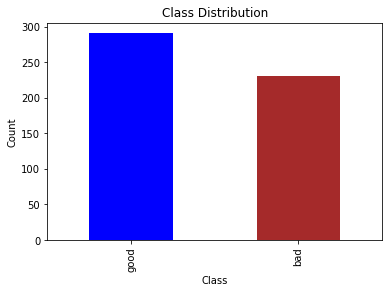

In [188]:
y = ger_credit['Risk']
class_distribution = pd.value_counts(y)
#print(class_distribution)

class_distribution.plot(kind='bar',color=['blue','brown'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# LogisticRegression

Logistic Regression Accuracy: 0.6
Logistic Regression Precision: 0.5909090909090909
Logistic Regression Confusion Matrix:
 [[37 18]
 [24 26]]
ROC AUC: 0.6741818181818182


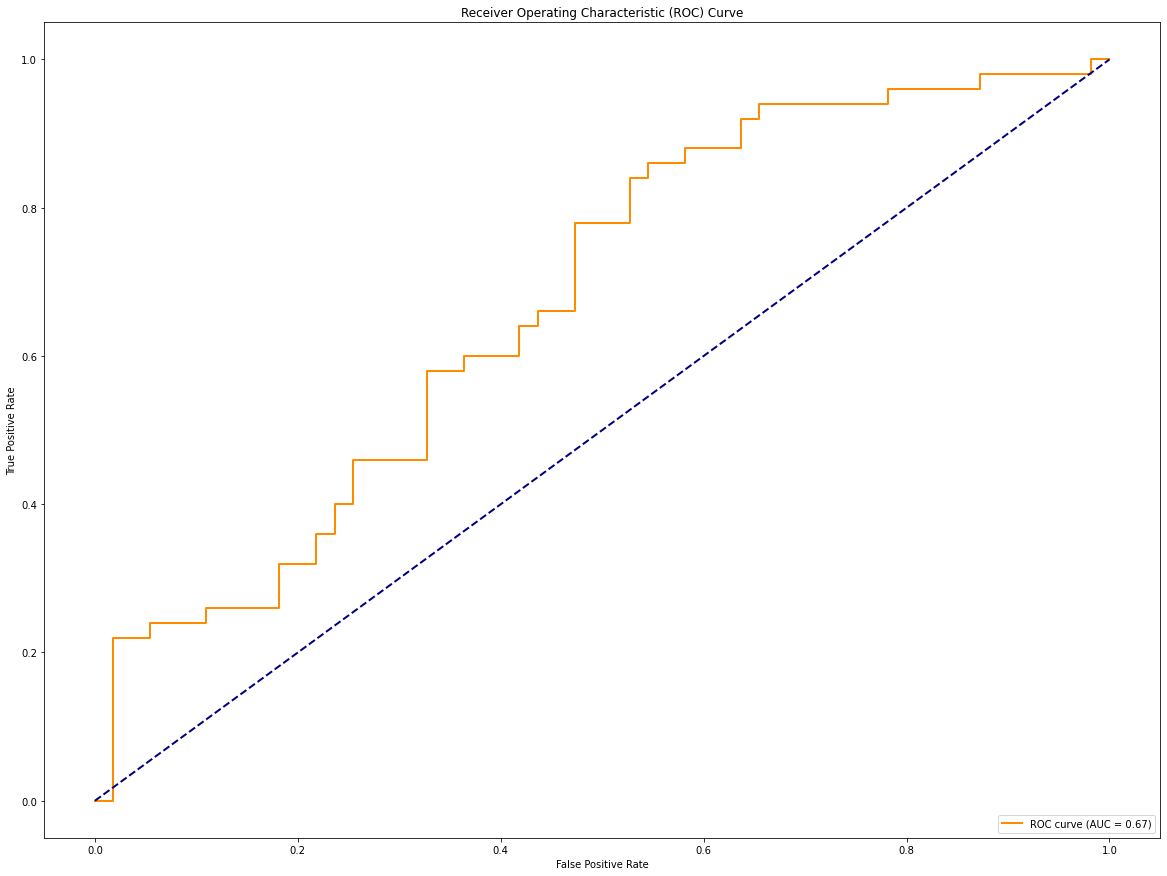

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

# created a LabelEncoder object
le = LabelEncoder()

#Using LabelEncoder, Encoded the all Columns
ger_credit['Purpose']= le.fit_transform(ger_credit['Purpose'])
ger_credit['Checking account']= le.fit_transform(ger_credit['Checking account'])
ger_credit['Saving accounts']= le.fit_transform(ger_credit['Saving accounts'])
ger_credit['Sex']= le.fit_transform(ger_credit['Sex'])
ger_credit['Housing']= le.fit_transform(ger_credit['Housing'])


# Create a custom mapping for ordinal encoding
risk_mapping = {'good': 0, 'bad': 1}

# Map the values and create a new column
ger_credit['Risk'] = ger_credit['Risk'].map(risk_mapping)


# Split the dataset into features and target
X = ger_credit.drop('Risk', axis=1)
y = ger_credit['Risk']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing data
lr_preds = lr.predict(X_test)

# Calculate the accuracy and confusion matrix of the logistic regression model
lr_acc = accuracy_score(y_test, lr_preds)
lr_cm = confusion_matrix(y_test, lr_preds)

# Calculate Precision:
precision = precision_score(y_test, lr_preds)

print('Logistic Regression Accuracy:', lr_acc)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Confusion Matrix:\n', lr_cm)

# Make predictions on the test set
y_prob = lr.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(20, 15))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

Accuracy: 0.5523809523809524
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58        55
           1       0.53      0.52      0.53        50

    accuracy                           0.55       105
   macro avg       0.55      0.55      0.55       105
weighted avg       0.55      0.55      0.55       105

Confusion Matrix:
[[32 23]
 [24 26]]
ROC AUC: 0.5509090909090909


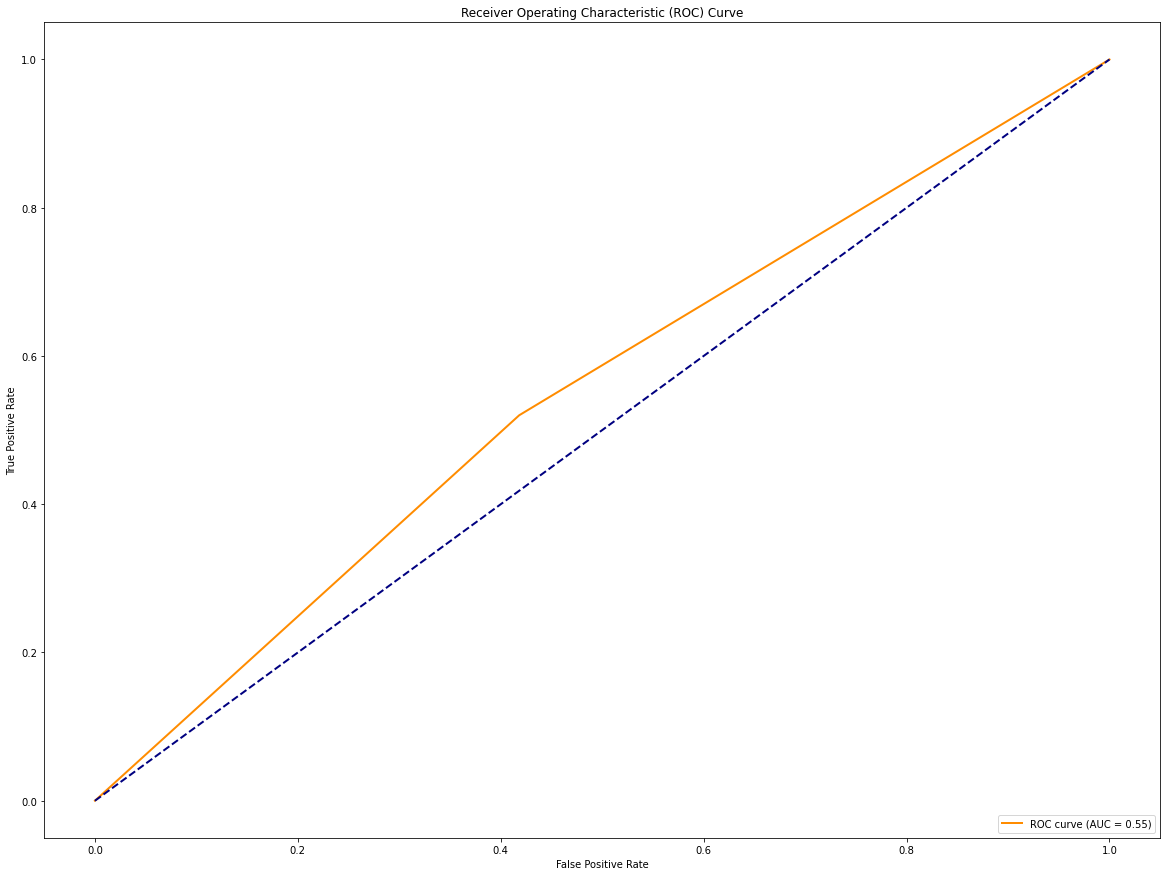

In [190]:
import pandas as pd
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

# Load the German Credit Data
df1 = pd.read_csv('german_credit_data.csv')

# remove rows with missing values :
german_credit_data = df1.dropna()
ger_credit_data = ger_credit_data.drop('Unnamed: 0', axis=1)

# created a LabelEncoder object
le = LabelEncoder()

# Assuming german_credit_data['Checking account'] contains both floats and strings
german_credit_data['Checking account'] = german_credit_data['Checking account'].astype(str)
german_credit_data['Saving accounts'] = german_credit_data['Saving accounts'].astype(str)


#Using LabelEncoder, Encoded the all Columns
german_credit_data['Purpose']= le.fit_transform(german_credit_data['Purpose'])
german_credit_data['Checking account']= le.fit_transform(german_credit_data['Checking account'])
german_credit_data['Saving accounts']= le.fit_transform(german_credit_data['Saving accounts'])
german_credit_data['Sex']= le.fit_transform(german_credit_data['Sex'])
german_credit_data['Housing']= le.fit_transform(german_credit_data['Housing'])


# Create a custom mapping for ordinal encoding
risk_mapping = {'good': 0, 'bad': 1}

# Map the values and create a new column
german_credit_data['Risk'] = german_credit_data['Risk'].map(risk_mapping)

# Assuming 'Risk' is the target variable
X = german_credit_data.drop('Risk', axis=1)
y = german_credit_data['Risk']

# Split the Data into Training and Testing Sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

#After training the model, you can use it to make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Make predictions on the test set
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(20, 15))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# RandomForest

Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        55
           1       0.60      0.50      0.54        50

    accuracy                           0.60       105
   macro avg       0.60      0.60      0.59       105
weighted avg       0.60      0.60      0.60       105

Confusion Matrix:
[[38 17]
 [25 25]]
ROC AUC: 0.6281818181818181


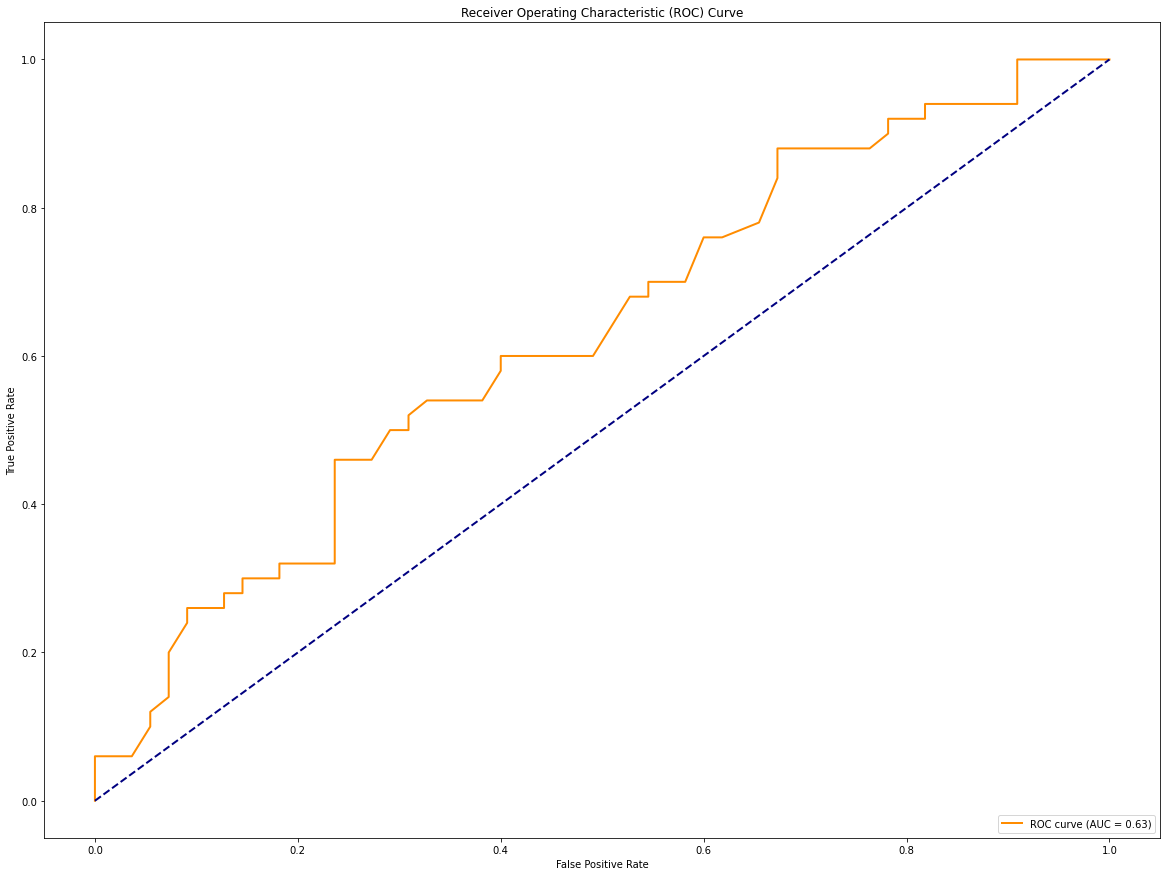

In [191]:
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

df2 = pd.read_csv('german_credit_data.csv')

# remove rows with missing values :
ger_credit_data = df2.dropna()
ger_credit_data = ger_credit_data.drop('Unnamed: 0', axis=1)


# created a LabelEncoder object
le = LabelEncoder()

#Using LabelEncoder, Encoded the all Columns
ger_credit_data['Purpose']= le.fit_transform(ger_credit_data['Purpose'])
ger_credit_data['Checking account']= le.fit_transform(ger_credit_data['Checking account'])
ger_credit_data['Saving accounts']= le.fit_transform(ger_credit_data['Saving accounts'])
ger_credit_data['Sex']= le.fit_transform(ger_credit_data['Sex'])
ger_credit_data['Housing']= le.fit_transform(ger_credit_data['Housing'])

# Create a custom mapping for ordinal encoding
risk_mapping = {'good': 0, 'bad': 1}

# Map the values and create a new column
ger_credit_data['Risk'] = ger_credit_data['Risk'].map(risk_mapping)

# Assuming 'Risk' is the target variable
X = ger_credit_data.drop('Risk', axis=1)
y = ger_credit_data['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


# Get predicted probabilities for positive class (class 1)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(20, 15))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [163]:
ger_credit

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


Random Forest Classifier : Accuracy on Original Data: 0.5904761904761905
Random Forest Classifier : Accuracy after PCA with 9 components: 0.6190476190476191
ROC-AUC Score: 0.5287272727272727


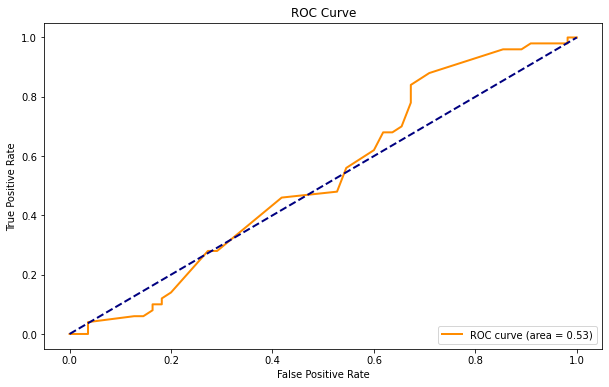

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df3 = pd.read_csv('german_credit_data.csv')

# remove rows with missing values :
ger_credit_pca = df3.dropna()
ger_credit_pca = ger_credit_pca.drop('Unnamed: 0', axis=1)

# Assuming you have loaded your dataset into a DataFrame (df)
# Replace 'target_column' with the actual column name of your target variable


# created a LabelEncoder object
le = LabelEncoder()

#Using LabelEncoder, Encoded the all Columns
ger_credit_pca['Purpose']= le.fit_transform(ger_credit_pca['Purpose'])
ger_credit_pca['Checking account']= le.fit_transform(ger_credit_pca['Checking account'])
ger_credit_pca['Saving accounts']= le.fit_transform(ger_credit_pca['Saving accounts'])
ger_credit_pca['Sex']= le.fit_transform(ger_credit_pca['Sex'])
ger_credit_pca['Housing']= le.fit_transform(ger_credit_pca['Housing'])

# Create a custom mapping for ordinal encoding
risk_mapping = {'good': 0, 'bad': 1}

# Map the values and create a new column
ger_credit_pca['Risk'] = ger_credit_pca['Risk'].map(risk_mapping)


# Drop the target variable for now
X = ger_credit_pca.drop('Risk', axis=1)

# Extract the target variable
y = ger_credit_pca['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Apply PCA
n_components =  9 # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

# Train a model on the original data
original_model = RandomForestClassifier(random_state=42)
original_model.fit(X_train_standardized, y_train)
y_pred_original = original_model.predict(X_test_standardized)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Random Forest Classifier : Accuracy on Original Data:", accuracy_original)

# Train a model using Random Forest Classifier on the data after PCA
pca_model = RandomForestClassifier(random_state=42)
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Random Forest Classifier : Accuracy after PCA with {n_components} components:", accuracy_pca)
# Predict probabilities on the test set
y_prob = rf_model.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute ROC-AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Logistic Regression : Accuracy on Original Data: 0.6
Logistic Regression : Accuracy after PCA: 0.6095238095238096
ROC-AUC Score: 0.6567272727272727


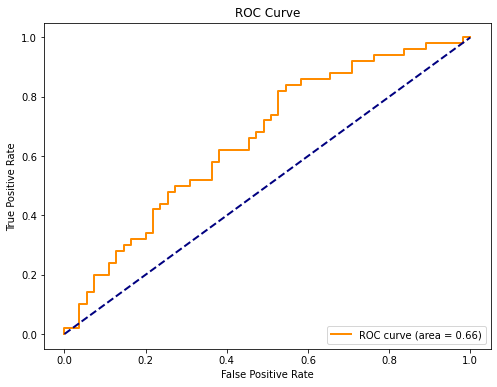

In [204]:
# Apply PCA
n_components =  5 # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)

# Train a model using Logistic Regression on the original data
# Fit a logistic regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing data
lr_preds = lr.predict(X_test)

# Calculate the accuracy and confusion matrix of the logistic regression model
lr_acc = accuracy_score(y_test, lr_preds)

# Train a model using Logistic Regression on the data after PCA
# Fit logistic regression on the transformed data
logreg_model = LogisticRegression()
logreg_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression : Accuracy on Original Data:", lr_acc)
print("Logistic Regression : Accuracy after PCA:", accuracy)

# Predict probabilities on the test set
y_prob = logreg_model.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute ROC-AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree :Accuracy on Original Data: 0.5523809523809524
Decision Tree : Accuracy after PCA: 0.5523809523809524
ROC-AUC Score: 0.5454545454545454


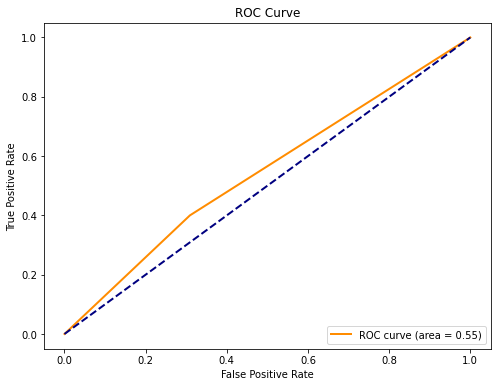

In [209]:
n_components = 4  # Adjust the number of components based on your requirements
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)


# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

#After training the model, you can use it to make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree :Accuracy on Original Data: {accuracy}')

# Fit a decision tree on the transformed data
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree : Accuracy after PCA:", accuracy)

# Predict probabilities on the test set
y_prob = dt_model.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute ROC-AUC score
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()